In [249]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [250]:
plt.rcParams['figure.figsize'] = [10,5]

## Data preparation.

In [251]:
df = pd.read_csv('bcancer.csv')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


In [252]:
df.shape

(569, 31)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<Figure size 1080x504 with 0 Axes>

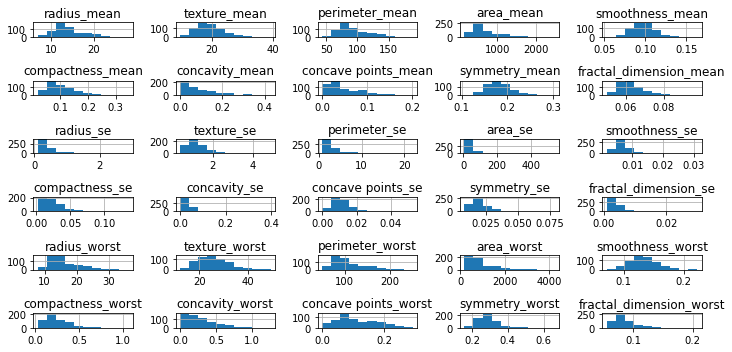

In [254]:
plt.figure(figsize=[15,7])
df.drop('diagnosis',axis=1).hist()
plt.tight_layout()
plt.show()

In [255]:
## distribution of the dependent variables:
df['diagnosis'].value_counts(normalize=True)*100

B   62.741652
M   37.258348
Name: diagnosis, dtype: float64

Text(1, 358, '62.74%')

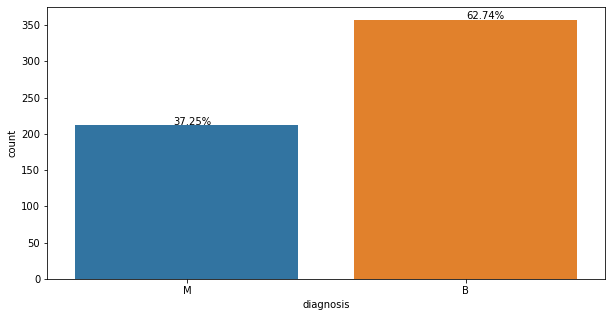

In [256]:
sns.countplot(df['diagnosis'])

plt.text(x=-0.05, y=213, s='37.25%')
plt.text(x=1, y=358, s='62.74%')

In [257]:
## missing value treatmnet:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [258]:
df_target = df['diagnosis']
df_target.head(2)

0    M
1    M
Name: diagnosis, dtype: object

In [259]:
df_feature = df.drop('diagnosis',axis=1)
df_feature.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020


In [260]:
## # if the value in the target variable is 'B' then replace it with 0 else with 1
# i.e. set 0 for benign (negative class)

for i in range(len(df_target)):
    if df_target[i]=='B':
        df_target[i]=0
    else:
        df_target[i]=1

In [261]:
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

### Defining function for plotting confusion matrix:

In [262]:
def plot_confusion_matrix(model,test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test,y_pred)
    c_mat = pd.DataFrame(cm, index=['actual:0','actual:1'],columns=['Pred:0','Pred:1'])
    sns.heatmap(c_mat, annot=True, fmt='d', cmap=ListedColormap(['lightgreen']),
                cbar=False, linewidths=0.1, annot_kws={'size':25})

### Defining Function for plotting roc-curve:

In [263]:
def plot_roc_curve(model,test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,'b')
    plt.plot([0,1],[0,1],'r--')

    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    
    plt.grid(True)

# K Nearest Neighbors (KNN).
- KNN is a classification machine learning algorithm used to identify the class of the observation.
- This algorithm search for `K` nearest points to determine the class of an observation.
- To identify the nearest points, it considers the distance metrics like `Euclidean`, `Manhattan`, `Chebyshev`, `Hamming`, and so on.

#### Let us normalize the data 
- We scale the variables to get all the variables in the same range. 
- With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [264]:
X_scaler = StandardScaler()

# scale all the numerical columns
scaled_feature = X_scaler.fit_transform(df_feature)

X = pd.DataFrame(scaled_feature, columns=df_feature.columns)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Train-test-split

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (455, 30)
y_train (455,)
X_test (114, 30)
y_test (114,)


##### Build a knn model on a training dataset using euclidean distance (Standardized Data)

In [266]:
## default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors=3)

knn_model = knn_classification.fit(X_train,y_train)

##### Build a confusion matrix.

In [267]:
y_test_pred = knn_model.predict(X_test)

In [268]:
cm = confusion_matrix(y_test, y_test_pred)

cm_matrix = pd.DataFrame(cm, columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
cm_matrix

,Predicted:0,Predicted:1
actual:0,75,0
actual:1,2,37


<AxesSubplot:>

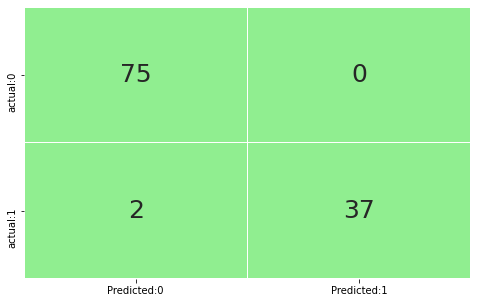

In [269]:
plt.figure(figsize=[8,5])
sns.heatmap(cm_matrix,annot=True, fmt='d', cmap=ListedColormap(['lightgreen']),
           cbar=False, linewidths=0.1, annot_kws={'size':25})

In [270]:
print('test-report: ',classification_report(y_test,y_test_pred))

test-report:                precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



## The accuracy is 98% for this model.

## Plot the Roc-curve.

In [271]:
*****************************************************************imp
*****************************************************************
y_test_pred_prob = knn_model.predict_proba(X_test)[:,1]

In [272]:
y_test_pred_prob

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.66666667,
       0.        , 0.        , 1.        , 0.        , 0.33333333,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.33333333,
       0.        , 0.        , 1.        , 0.        , 0.33333333,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.33333333, 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.33333333, 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

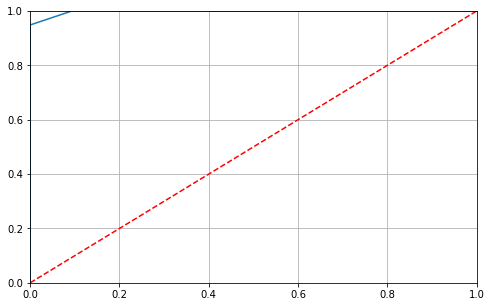

In [273]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=[8,5])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.grid()

In [274]:
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.9976068376068375

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) is away from the dotted line; with the AUC score 0.9976.

## Optimal Value of K (using GridSearchCV)

In [275]:
tuned_params = {'n_neighbors':np.arange(1,25,2),
               'metric':['hamming','euclidean','manhattan','Chebyshev']}

knn = KNeighborsClassifier()

gsearch = GridSearchCV(estimator=knn,
                      param_grid=tuned_params,
                      cv=5,
                      scoring='accuracy')

knn_gsearch_model = gsearch.fit(X_train, y_train)

In [276]:
knn_gsearch_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

#### Draw a line plot to see the error rate for each value of k using the euclidean distance as a metric of knn model.

In [277]:
error_rate = []
for i in range(1,25,2):
    knn = KNeighborsClassifier(i,metric='euclidean')
    cv = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv = cv.mean()
    error_rate.append(1-cv)

In [278]:
error_rate

[0.05494505494505497,
 0.03516483516483526,
 0.03736263736263745,
 0.03736263736263745,
 0.03736263736263745,
 0.03956043956043964,
 0.0483516483516484,
 0.05054945054945059,
 0.05054945054945059,
 0.05274725274725278,
 0.05494505494505497,
 0.05494505494505497]

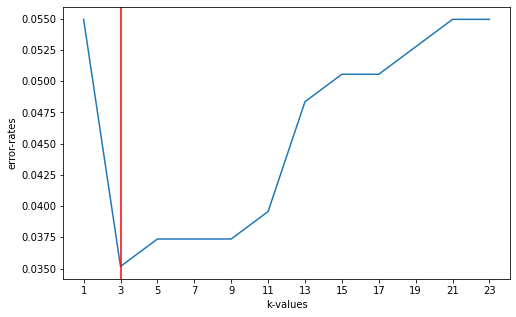

In [279]:
plt.figure(figsize=[8,5])
plt.plot(range(1,25,2),error_rate)
plt.xlabel('k-values')
plt.ylabel('error-rates')
plt.xticks(range(1,25,2))
plt.axvline(x=3,color='red')
plt.show()

## Interpretation:
- **we can see the optimal value k=3 obtained from the gridSearchcv has the lowest error-rate.**

## OR second method to plot and interpret the optimal value for k.

In [280]:
accuracy = []
for i in range(1,25,2):
    knn = KNeighborsClassifier(i, metric='euclidean')
    cv = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv = cv.mean()
    accuracy.append(cv)

In [281]:
accuracy

[0.945054945054945,
 0.9648351648351647,
 0.9626373626373625,
 0.9626373626373625,
 0.9626373626373625,
 0.9604395604395604,
 0.9516483516483516,
 0.9494505494505494,
 0.9494505494505494,
 0.9472527472527472,
 0.945054945054945,
 0.945054945054945]

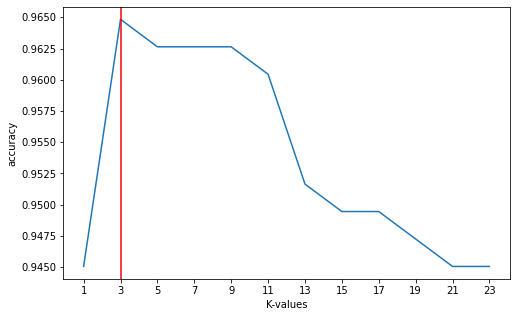

In [282]:
plt.figure(figsize=[8,5])
plt.plot(range(1,25,2),accuracy)
plt.xlabel('K-values')
plt.ylabel('accuracy')

plt.xticks(range(1,25,2))
plt.axvline(x=3,color='red')

plt.show()

## Interpretation:
- **as we can see from the above graph the optimal value of k=3, obtained from the gridsearch cv has the highest accuracy.**

## Calculate performance measures on the test set (knn -gridSearch_model)

In [283]:
y_pred = knn_gsearch_model.predict(X_test)
y_pred[:5]

array([1, 0, 0, 1, 0])

In [284]:
print('Classification Report for test set: \n', classification_report(y_test,y_pred))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



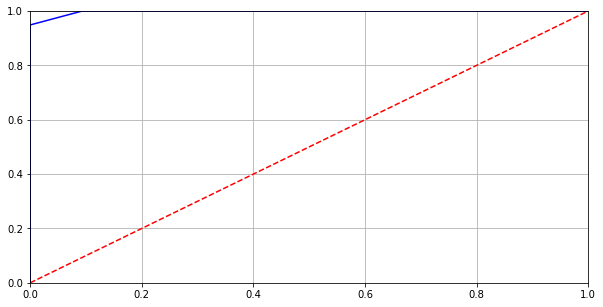

In [285]:
plot_roc_curve(knn_gsearch_model,X_test)

In [286]:
y_test_prob = knn_gsearch_model.predict_proba(X_test)[:,1]
y_test_prob[:5]

array([1., 0., 0., 1., 0.])

In [287]:

print('The auc-score for knn-grid search model is: ',roc_auc_score(y_test, y_test_prob))

The auc-score for knn-grid search model is:  0.9976068376068375


# Naive Bayes Algorithim.
- **It uses a Bayes' Theorem with the assumption of independence of predictor variables.** 
- **The sklearn library provides different naive bayes classifiers, as GaussianNB, MultinomialNB and so on.**

###### Build a naive bayes model on a training dataset.

In [288]:
Gnb = GaussianNB()

Gnb_model = Gnb.fit(X_train,y_train)

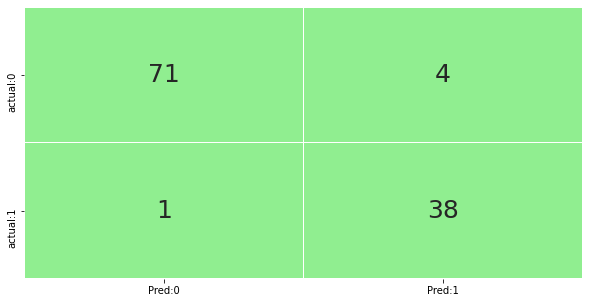

In [289]:
## plotting confusion matrix by calling the function:
plot_confusion_matrix(Gnb_model,X_test)

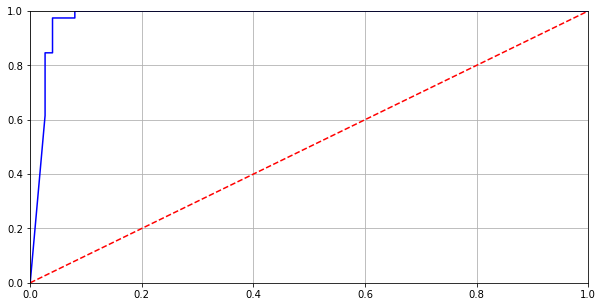

In [290]:
## plotting the roc-curve by calling the function:
plot_roc_curve(Gnb_model, X_test)

In [291]:
y_test_proba = Gnb_model.predict_proba(X_test)[:,1]

In [292]:
metrics.roc_auc_score(y_test,y_test_proba)

0.9784615384615385

### Interpretation: From the above plot, we can see that our classifier (gnb_model) is away from the red-dotted line, with  the auc-score of 0.9781.

In [293]:
y_test_pred = Gnb_model.predict(X_test)
y_test_pred[:5]

array([1, 0, 0, 1, 0])

In [294]:
y_test_proba = Gnb_model.predict_proba(X_test)[:,1]
y_test_proba[:5]

array([1.00000000e+00, 5.01665350e-17, 5.13004031e-15, 1.00000000e+00,
       3.63823203e-18])

In [295]:
print('test-report: ',classification_report(y_test,y_test_pred))

test-report:                precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Comparision b/w KNN model and Naive bayes model:

In [296]:
print('The auc-score for knn-grid search model is: ',roc_auc_score(y_test, y_test_prob))

The auc-score for knn-grid search model is:  0.9976068376068375


In [297]:
print('The auc-score for Gnb model is: ',roc_auc_score(y_test,y_test_proba))

The auc-score for Gnb model is:  0.9784615384615385


### Interpretation: The Auc Score of KNN Model is slightly higher than that of Gaussian Naive Bayes model. Also KNN model is more stable than Gaussian Naive Bayes model.